In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sns
from typing import Dict, Tuple
import warnings
import random
from math import comb
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 999

warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', header= None)

##  Pre-processed

In [29]:
df_gens = df[59:].transpose()
df_gens = df_gens.rename(columns=df_gens.iloc[0])
df_gens = df_gens[1:]

<AxesSubplot:>

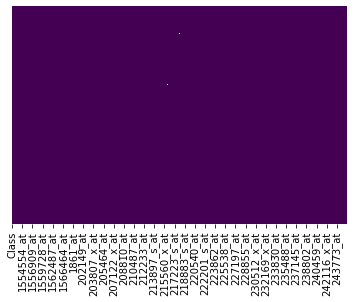

In [30]:
sns.heatmap(df_gens.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
df_gens.dtypes

Class              object
ID_REF             object
1007_s_at          object
1053_at            object
117_at             object
                    ...  
AFFX-ThrX-5_at     object
AFFX-ThrX-M_at     object
AFFX-TrpnX-3_at    object
AFFX-TrpnX-5_at    object
AFFX-TrpnX-M_at    object
Length: 54677, dtype: object

In [32]:
df_gens.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,1552299_at,1552301_a_at,1552302_at,1552303_a_at,1552304_at,1552306_at,1552307_a_at,1552309_a_at,1552310_at,1552311_a_at,1552312_a_at,1552314_a_at,1552315_at,1552316_a_at,1552318_at,1552319_a_at,1552320_a_at,1552321_a_at,1552322_at,1552323_s_at,1552325_at,1552326_a_at,1552327_at,1552329_at,1552330_at,1552332_at,1552334_at,1552335_at,1552337_s_at,1552338_at,1552340_at,1552343_s_at,1552344_s_at,1552347_at,1552348_at,1552349_a_at,1552354_at,1552355_s_at,1552359_at,1552360_a_at,1552362_a_at,1552364_s_at,1552365_at,1552367_a_at,1552368_at,1552370_at,1552372_at,1552373_s_at,1552375_at,1552377_s_at,1552378_s_at,1552379_at,1552381_at,1552383_at,1552384_a_at,1552386_at,1552388_at,1552389_at,1552390_a_at,1552391_at,1552393_at,1552394_a_at,1552395_at,1552396_at,1552398_a_at,1552399_a_at,1552400_a_at,1552401_a_at,1552402_at,1552405_at,1552408_at,1552409_a_at,1552410_at,1552411_at,1552412_a_at,1552414_at,1552415_a_at,1552417_a_at,1552418_at,1552419_s_at,1552421_a_at,1552422_at,1552423_at,1552424_at,1552425_a_at,1552426_a_at,1552427_at,1552430_at,1552432_at,1552436_a_at,1552438_a_at,1552439_s_at,1552440_at,1552445_a_at,1552448_a_at,1552449_a_at,1552450_a_at,1552452_at,1552453_a_at,1552455_at,1552456_a_at,1552457_a_at,1552458_at,1552459_a_at,1552461_at,1552463_at,1552466_x_at,1552467_at,1552468_a_at,1552470_a_at,1552472_a_at,1552473_at,1552474_a_at,1552476_s_at,1552477_a_at,1552478_a_at,1552480_s_at,1552481_s_at,1552482_at,1552484_at,1552485_at,1552486_s_at,1552487_a_at,1552489_s_at,1552490_at,1552491_at,1552493_s_at,1552494_at,1552496_a_at,1552497_a_at,1552498_at,1552499_a_at,1552501_a_at,1552502_s_at,1552503_at,1552504_a_at,1552506_at,1552507_at,1552508_at,1552509_a_at,1552510_at,1552511_a_at,1552514_at,1552515_at,1552516_a_at,1552518_s_at,1552519_at,1552520_at,1552521_a_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at,1552531_a_at,1552532_a_at,1552535_at,1552536_at,1552538_a_at,1552540_s_at,1552541_at,1552542_s_at,1552543_a_at,1552544_at,1552546_a_at,1552548_at,1552549_a_at,1552552_s_at,1552553_a_at,1552554_a_at,1552555_at,1552557_a_at,1552558_a_at,1552559_a_at,1552562_at,1552563_a_at,1552564_at,1552566_at,1552568_at,1552569_a_at,1552570_at,1552572_a_at,1552573_s_at,1552575_a_at,1552576_at,1552578_a_at,1552579_a_at,1552580_at,1552582_at,1552583_s_at,1552584_at,1552585_s_at,1552586_at,1552587_at,1552588_a_at,1552590_a_at,1552592_at,1552594_at,1552596_at,1552598_at,1552599_at,1552602_at,1552604_at,1552605_s_at,1552607_at,1552608_at,1552609_s_at,1552610_a_at,...,46947_at,47069_at,47083_at,47105_at,47530_at,47550_at,47553_at,47560_at,47571_at,47608_at,47773_at,48030_i_at,48031_r_at,48106_at,48117_at,48531_at,48580_at,48612_at,48659_at,48808_at,48825_at,49049_at,49051_g_at,49077_at,49111_at,49306_at,49327_at,49329_at,49452_at,49485_at,49679_s_at,49878_at,50221_at,50277_at,50314_i_at,50374_at,50376_at,50400_at,50965_at,51146_at,51158_at,51176_at,51192_at,51200_at,51226_at,51228_at,51774_s_at,52005_at,52078_at,52159_at,52164_at,52169_at,52255_s_at,52285_f_at,52651_at,52731_at,52741_at,52837_at,52940_at,52975_at,53071_s_at,53076_at,53202_at,53720_at,53912_at,53968_at,53987_at,53991_at,54037_at,54051_at,54632_at,54970_at,55065_at,55081_at,55093_at,55583_at,55616_at,55662_at,55692_at,55705_at,55872_at,56197_at,56256_at,564_at,56748_at,56821_at,56829_at,56919_at,57082_at,57163_at,57516_at,57532_at,57539_at,57540_at,57588_at,57703_at,57715_at,57739_at,58308_at,58367_s_at,58696_at,58780_s_at,58900_at,58916_at,58994_at,59375_at,59433_at,59437_at,59625_at,59631_at,59644_at,59697_at,59705_at,59999_at,60084

In [34]:
df_gens.to_csv('AMI_GSE66360_after_preprocess.csv',index=False)

## Analysis

### A - High level description of the data and some pre-processing

In [35]:
df = pd.read_csv('AMI_GSE66360_after_preprocess.csv')

##### 1) How many genes profiled?

In [36]:
print("There are {} genes profiles - each represented by a column".format(df.shape[0]))

There are 99 genes profiles - each represented by a column


##### 2) How many samples (subjects/patients) in total?

In [37]:
print("There are {} samples - each represented by a row".format(df.shape[1]))

There are 54677 samples - each represented by a row


##### 3) How many samples in each class?

In [38]:
print("In class H (Healthy) here are {} samples\nIn class M (Myocardial) here are {} samples\n"
      .format(df[df["Class"] == 'H'].shape[0],
              df[df["Class"] == 'M'].shape[0]))

In class H (Healthy) here are 50 samples
In class M (Myocardial) here are 49 samples



##### 4) If there are missing values, then remove the entire row (gene) from the data matrix.How many rows left now?

In [39]:
df.dropna(axis='columns', inplace=True) # Removing columns (columns represent genes) with missing values

In [40]:
print("After removeing null ,There are {} genes profiles - each represented by a column".format(df.shape[0]))
print("After removeing null ,There are {} samples - each represented by a row".format(df.shape[1]))

After removeing null ,There are 99 genes profiles - each represented by a column
After removeing null ,There are 54630 samples - each represented by a row


In [41]:
df.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,1552299_at,1552301_a_at,1552302_at,1552303_a_at,1552304_at,1552306_at,1552309_a_at,1552310_at,1552311_a_at,1552312_a_at,1552314_a_at,1552315_at,1552316_a_at,1552318_at,1552319_a_at,1552320_a_at,1552321_a_at,1552322_at,1552323_s_at,1552325_at,1552326_a_at,1552327_at,1552329_at,1552330_at,1552332_at,1552334_at,1552335_at,1552337_s_at,1552338_at,1552340_at,1552343_s_at,1552344_s_at,1552347_at,1552348_at,1552349_a_at,1552354_at,1552355_s_at,1552359_at,1552360_a_at,1552362_a_at,1552364_s_at,1552365_at,1552367_a_at,1552368_at,1552370_at,1552372_at,1552373_s_at,1552375_at,1552377_s_at,1552378_s_at,1552379_at,1552381_at,1552383_at,1552384_a_at,1552386_at,1552388_at,1552389_at,1552390_a_at,1552391_at,1552393_at,1552394_a_at,1552395_at,1552396_at,1552398_a_at,1552399_a_at,1552400_a_at,1552401_a_at,1552402_at,1552405_at,1552408_at,1552409_a_at,1552410_at,1552411_at,1552412_a_at,1552414_at,1552415_a_at,1552417_a_at,1552418_at,1552419_s_at,1552421_a_at,1552422_at,1552423_at,1552424_at,1552425_a_at,1552426_a_at,1552427_at,1552430_at,1552432_at,1552436_a_at,1552438_a_at,1552439_s_at,1552440_at,1552445_a_at,1552448_a_at,1552449_a_at,1552450_a_at,1552452_at,1552453_a_at,1552455_at,1552456_a_at,1552457_a_at,1552458_at,1552459_a_at,1552461_at,1552463_at,1552466_x_at,1552467_at,1552468_a_at,1552470_a_at,1552472_a_at,1552473_at,1552474_a_at,1552476_s_at,1552477_a_at,1552478_a_at,1552480_s_at,1552481_s_at,1552482_at,1552484_at,1552485_at,1552486_s_at,1552487_a_at,1552489_s_at,1552490_at,1552491_at,1552493_s_at,1552494_at,1552496_a_at,1552497_a_at,1552498_at,1552499_a_at,1552501_a_at,1552502_s_at,1552503_at,1552504_a_at,1552506_at,1552507_at,1552509_a_at,1552510_at,1552511_a_at,1552514_at,1552515_at,1552516_a_at,1552518_s_at,1552519_at,1552520_at,1552521_a_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at,1552531_a_at,1552532_a_at,1552535_at,1552536_at,1552538_a_at,1552540_s_at,1552541_at,1552542_s_at,1552543_a_at,1552544_at,1552546_a_at,1552548_at,1552549_a_at,1552552_s_at,1552553_a_at,1552554_a_at,1552555_at,1552557_a_at,1552558_a_at,1552559_a_at,1552562_at,1552563_a_at,1552564_at,1552566_at,1552568_at,1552569_a_at,1552570_at,1552572_a_at,1552573_s_at,1552575_a_at,1552576_at,1552578_a_at,1552579_a_at,1552580_at,1552582_at,1552583_s_at,1552584_at,1552585_s_at,1552586_at,1552587_at,1552588_a_at,1552590_a_at,1552592_at,1552594_at,1552596_at,1552598_at,1552599_at,1552602_at,1552604_at,1552605_s_at,1552607_at,1552608_at,1552609_s_at,1552610_a_at,1552611_a_at,1552612_at,...,46947_at,47069_at,47083_at,47105_at,47530_at,47550_at,47553_at,47560_at,47571_at,47608_at,47773_at,48030_i_at,48031_r_at,48106_at,48117_at,48531_at,48580_at,48612_at,48659_at,48808_at,48825_at,49049_at,49051_g_at,49077_at,49111_at,49306_at,49327_at,49329_at,49452_at,49485_at,49679_s_at,49878_at,50221_at,50277_at,50314_i_at,50374_at,50376_at,50400_at,50965_at,51146_at,51158_at,51176_at,51192_at,51200_at,51226_at,51228_at,51774_s_at,52005_at,52078_at,52159_at,52164_at,52169_at,52255_s_at,52285_f_at,52651_at,52731_at,52741_at,52837_at,52940_at,52975_at,53071_s_at,53076_at,53202_at,53720_at,53912_at,53968_at,53987_at,53991_at,54037_at,54051_at,54632_at,54970_at,55065_at,55081_at,55093_at,55583_at,55616_at,55662_at,55692_at,55705_at,55872_at,56197_at,56256_at,564_at,56748_at,56821_at,56829_at,56919_at,57082_at,57163_at,57516_at,57532_at,57539_at,57540_at,57588_at,57703_at,57715_at,57739_at,58308_at,58367_s_at,58696_at,58780_s_at,58900_at,58916_at,58994_at,59375_at,59433_at,59437_at,59625_at,59631_at,59644_at,59697_at,59705_at,59999_at,60084

In [42]:
#convert string to float (done her becuse we cant convert null to float )
df[df.columns[2:]] = df[df.columns[2:]].astype(float) 

#### 5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

In [43]:
# N_genes = 20

# random_genes = random.sample(list(df.columns[2:]), N_genes)
# fig = plt.figure(figsize = (15,15))

# for n, gene in enumerate(random_genes):
#      df[gene].hist(by=df['Class'], bins=10,legend=True)

<Figure size 1080x1080 with 0 Axes>

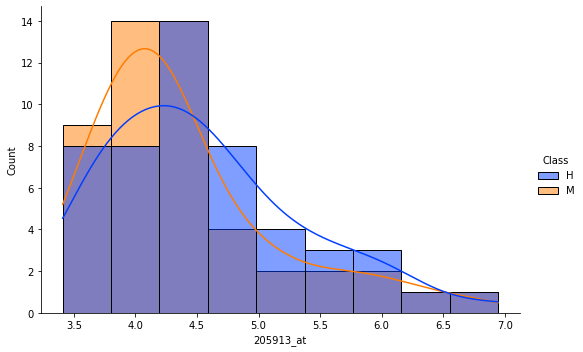

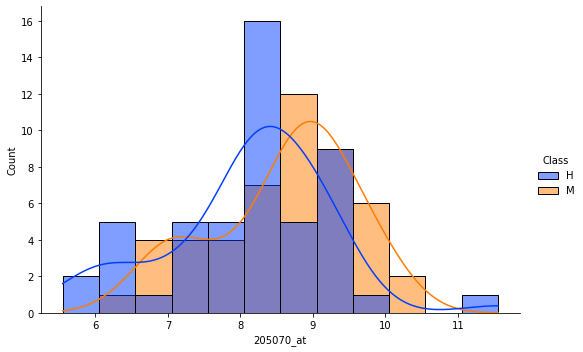

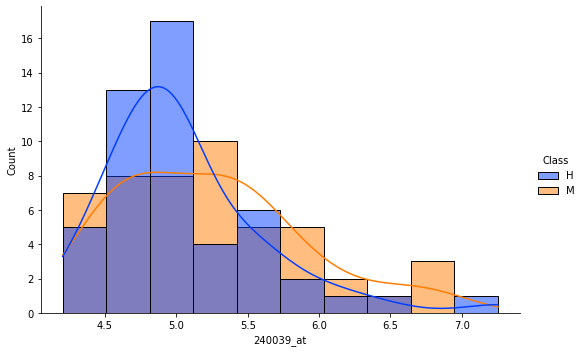

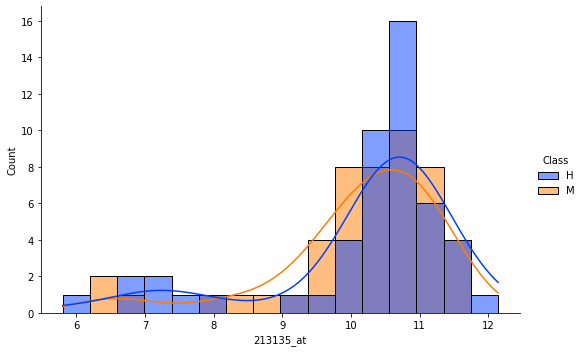

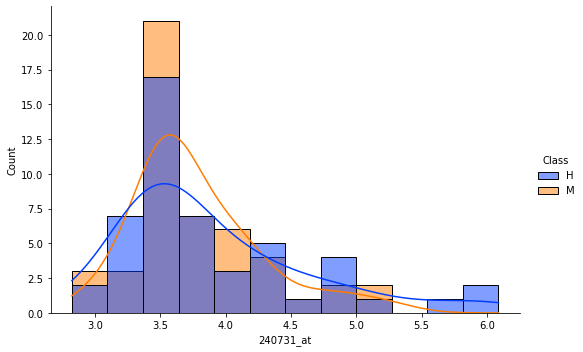

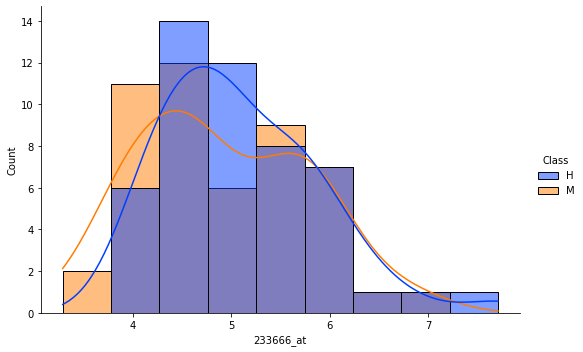

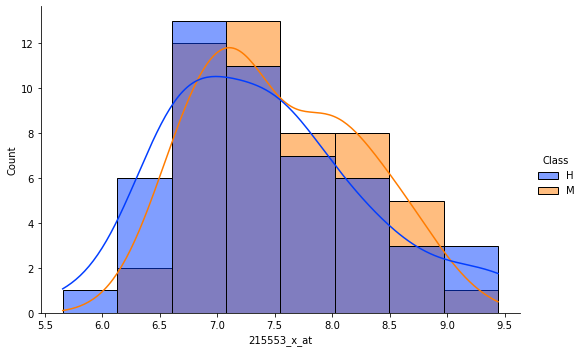

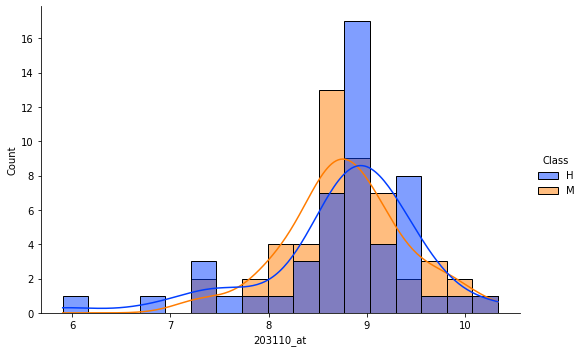

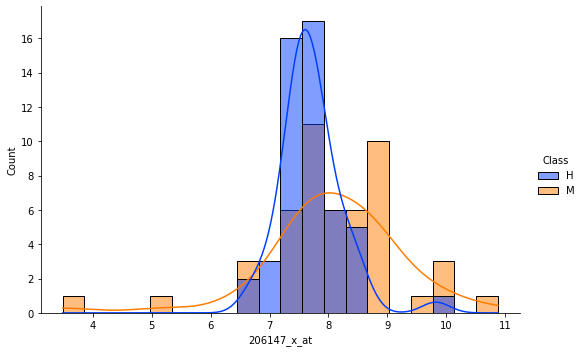

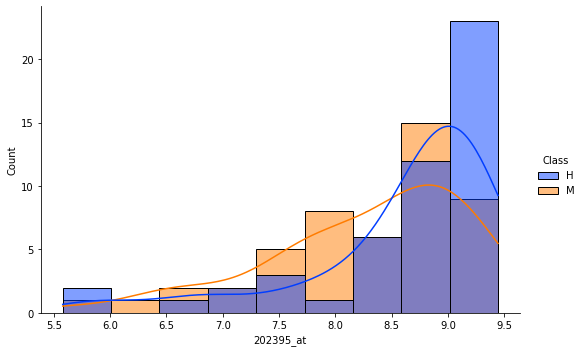

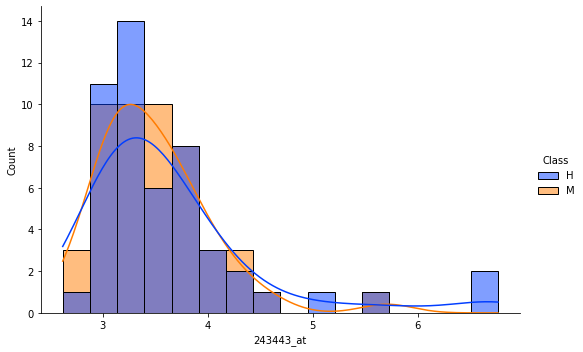

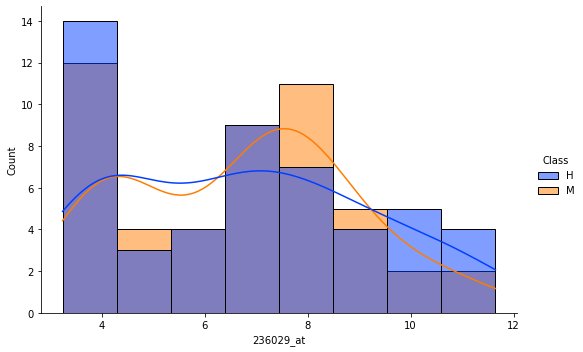

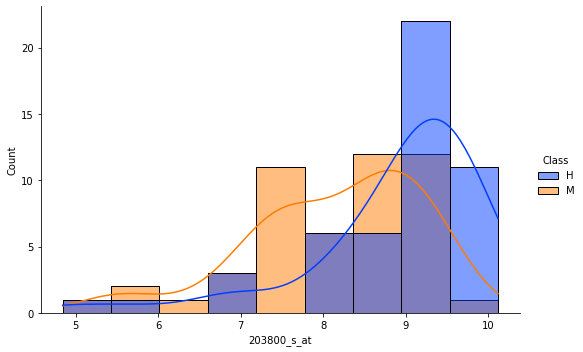

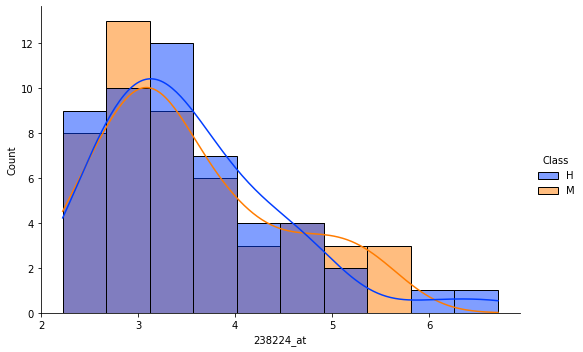

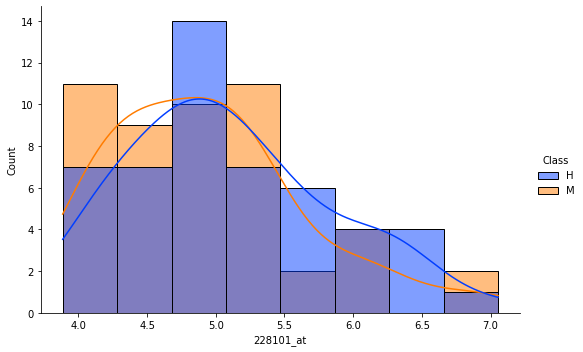

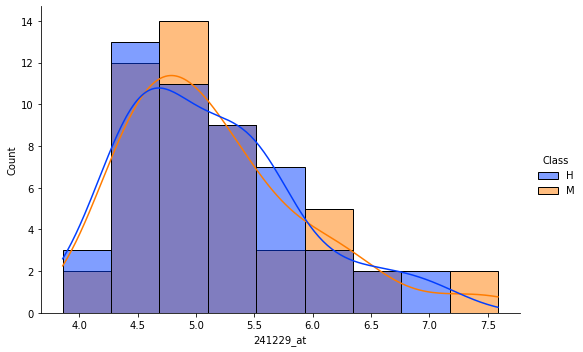

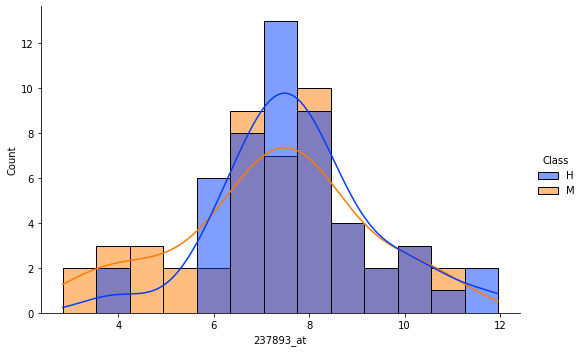

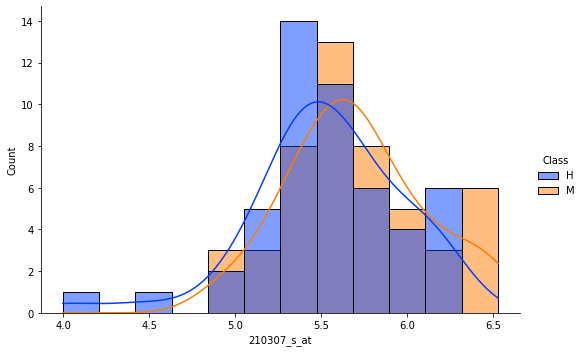

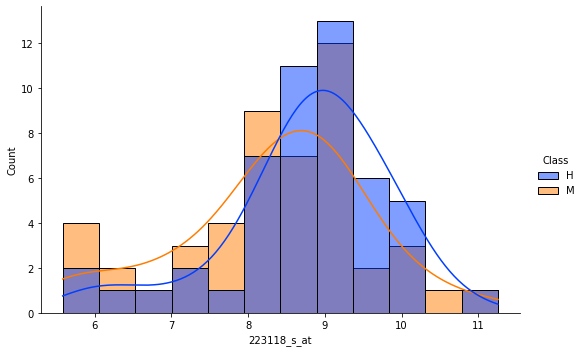

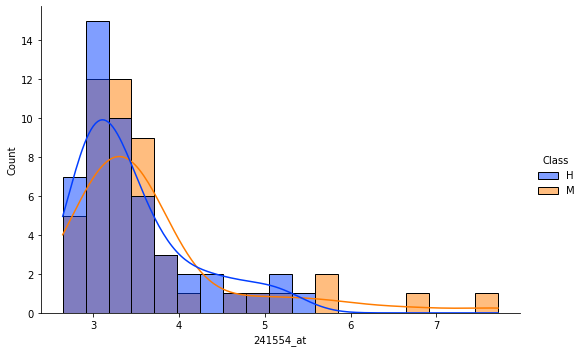

In [44]:
N_genes = 20

random_genes = random.sample(list(df.columns[2:]), N_genes)
fig = plt.figure(figsize = (15,15))

for n, gene in enumerate(random_genes):
    sns.displot(data=df, x=gene, hue='Class', kind='hist',kde=True,palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### B. WRS for differential expression (DE)

#### 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks ofg’s expression levels measured for samples labeled M?

𝐸(𝑇) = 𝐵(𝑁 + 1)/2

In our case B is the Myocardial so we have 49 Myocardial , and 99 genes.

In [45]:
B = 49
N = 99

print("E(T) = {}".format((B*(N+1))/2))

E(T) = 2450.0


#### 2) Denote this sum of ranks by RS(g). What is the maximal value, c,that RS(g) can take?

<!-- The maximum value will be in case all the values of M are at the bottom of the ranking.
1 option (order) from all ${{N \choose B}}$ cases.
so its :
$$\frac {1}{{N \choose B}}$$ -->

In [46]:
# print("The maximal value is {}".format(1/comb(N,B)))

#### 3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

#### 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

#### 5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [47]:
ranked = []
for g in df.columns[2:]:
    ranked.append(df[g].rank()[df['Class'] == 'M'].sum())


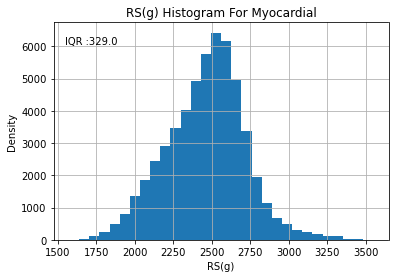

In [48]:
ranked_df = pd.DataFrame(ranked)
ranked_df.hist(bins=30)
plt.title('RS(g) Histogram For Myocardial')
plt.xlabel('RS(g)')
plt.ylabel('Density')
max_y = plt.gca().get_ylim()[1]
min_x = plt.gca().get_xlim()[0]
plt.text(min_x*1.05, max_y*0.9, "IQR :{}".format(stats.iqr(ranked_df)))
plt.grid(True)
plt.show()

In [49]:
print("The IQR :{}".format(stats.iqr(ranked_df)))

The IQR :329.0


### C. Differential Expression

#### The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene,using both Student t-test and WRS test. Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [102]:
null_modle_p_value = 0.07 # certainty of 93%

df_m = df[df['Class']=='M']
df_h = df[df['Class']=='H']

gens = df.columns[2:]

t_test_overexpressed = 0
t_test_underexpressed = 0

wrs_overexpressed = 0
wrs_underexpressed = 0

#### WRS

In [103]:
from scipy.stats import ranksums

overexpressed_gens = []
overexpressed_statistic = []
overexpressed_pvalue = []

underexpressed_gens = []
underexpressed_statistic = []
underexpressed_pvalue = []

for g in gens:
    wrs_test ,p_value = ranksums(df_m[g], df_h[g])
    
    if (p_value / 2 <= null_modle_p_value) & ( wrs_test > 0 ):
        wrs_overexpressed += 1
        overexpressed_gens.append(g)
        overexpressed_statistic.append(wrs_test)
        overexpressed_pvalue.append(p_value)
        
    elif (p_value / 2 <= null_modle_p_value) & ( wrs_test <= 0 ):
        wrs_underexpressed += 1
        underexpressed_gens.append(g)
        underexpressed_statistic.append(wrs_test)
        underexpressed_pvalue.append(p_value)

In [104]:
details_overexpressed = {
    'p_value' : overexpressed_pvalue,
    'statistic' : overexpressed_statistic
}

wrs_overexpressed_df = pd.DataFrame(details_overexpressed ,index = overexpressed_gens )
  
#wrs_overexpressed_df

,p_value,statistic
117_at,0.000018,4.290106
1320_at,0.091671,1.686649
1552271_at,0.074322,1.784628
1552276_a_at,0.018697,2.351510
1552279_a_at,0.083874,1.728640
...,...,...
AFFX-ThrX-3_at,0.018005,2.365507
AFFX-ThrX-5_at,0.022517,2.281525
AFFX-ThrX-M_at,0.027486,2.204541
AFFX-TrpnX-3_at,0.115332,1.574672


In [105]:
details_underexpressed = {
    'p_value' : underexpressed_pvalue,
    'statistic' : underexpressed_statistic
}

wrs_underexpressed_df = pd.DataFrame(details_underexpressed ,index = underexpressed_gens )
  
#wrs_underexpressed_df

,p_value,statistic
1294_at,0.093025,-1.679650
1316_at,0.002074,-3.079359
1405_i_at,0.003518,-2.918392
1431_at,0.000232,-3.681233
1552277_a_at,0.010851,-2.547469
...,...,...
78383_at,0.105951,-1.616663
81811_at,0.006211,-2.736430
91617_at,0.028996,-2.183545
AFFX-HUMISGF3A/M97935_3_at,0.004022,-2.876401


In [106]:
print('WRS overexpressed genes in M vs H is {} at a p-value better than 0.07'.format(wrs_overexpressed))

WRS overexpressed genes in M vs H is 10787 at a p-value better than 0.07


In [107]:
print('WRS underexpressed genes in M vs H is {} at a p-value better than 0.07'.format(wrs_underexpressed)) 

WRS underexpressed genes in M vs H is 10667 at a p-value better than 0.07


#### T-Test

In [84]:
from scipy.stats import ttest_ind
# we divide the values by 2 , "ttest_ind()" returns the 2-tailed p-value of the test, we divide the values by 2
for g in gens:
    t_test ,p_value = ttest_ind(df_m[g], df_h[g],equal_var=True)
    
    if (p_value / 2 <= null_modle_p_value) & ( t_test > 0 ):
        t_test_overexpressed += 1
    elif (p_value / 2 <= null_modle_p_value) & ( t_test <= 0 ):
        t_test_underexpressed += 1

In [85]:
print('T-TEST overexpressed genes in M vs H is {} at a p-value better than 0.07'.format(t_test_overexpressed))

T-TEST overexpressed genes in M vs H is 8517 at a p-value better than 0.07


In [86]:
print('T-TEST underexpressed genes in M vs H is {} at a p-value better than 0.07'.format(t_test_underexpressed)) 

T-TEST underexpressed genes in M vs H is 8639 at a p-value better than 0.07


### D. Correlations
#### Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

In [109]:
n= 80
significant_overexpressed = wrs_overexpressed_df.sort_values(by='p_value')[:n]
significant_underexpressed = wrs_underexpressed_df.sort_values(by='p_value')[:n]

In [116]:
significant_gens = significant_overexpressed.append(significant_underexpressed).index

In [117]:
D_df = df[significant_gens]

In [118]:
D_df

,208869_s_at,216248_s_at,204622_x_at,244054_at,203888_at,203887_s_at,217202_s_at,203574_at,241279_at,240103_at,211372_s_at,208868_s_at,211302_s_at,210423_s_at,218559_s_at,216015_s_at,222934_s_at,204621_s_at,205627_at,38037_at,205403_at,216236_s_at,1555167_s_at,216016_at,203821_at,205863_at,205239_at,1552772_at,244840_x_at,204620_s_at,201531_at,217591_at,215990_s_at,235536_at,203708_at,202672_s_at,220034_at,203853_s_at,1558299_at,204908_s_at,205237_at,201963_at,223218_s_at,210146_x_at,211924_s_at,1568830_at,201842_s_at,223597_at,205174_s_at,239085_at,221731_x_at,202497_x_at,201473_at,220086_at,205476_at,207275_s_at,205067_at,211458_s_at,202464_s_at,1555643_s_at,216243_s_at,239336_at,210845_s_at,202291_s_at,209185_s_at,215775_at,39402_at,202988_s_at,204440_at,213975_s_at,209774_x_at,232213_at,204351_at,235568_at,200648_s_at,228648_at,243395_at,211628_x_at,203936_s_at,218319_at,226423_at,234095_at,206978_at,243458_at,218805_at,64064_at,220144_s_at,206991_s_at,232974_at,225886_at,217482_at,218646_at,228071_at,1552321_a_at,237953_at,202741_at,205488_at,221626_at,200901_s_at,205804_s_at,201998_at,222243_s_at,208296_x_at,212199_at,229367_s_at,221937_at,211597_s_at,1557113_at,1562245_a_at,221011_s_at,219924_s_at,239642_at,205484_at,209829_at,233852_at,206152_at,207394_at,228843_at,236583_at,227486_at,213888_s_at,231932_at,213405_at,223377_x_at,226693_at,1552320_a_at,64418_at,235304_at,1562697_at,225387_at,236751_at,236265_at,227877_at,219494_at,1560147_at,219532_at,213317_at,223671_x_at,239862_at,241582_at,203476_at,204236_at,218607_s_at,243764_at,229364_at,204352_at,1562698_x_at,219590_x_at,224196_x_at,221223_x_at,223588_at,221081_s_at,222108_at,235310_at,230428_at,235779_at,242874_at,1565882_at,227626_at,224879_at
0,8.070220,5.802974,6.896882,6.711893,5.780497,6.038182,6.781219,9.023625,6.667995,7.770745,7.585233,7.496725,7.105603,6.652459,8.035381,5.243293,9.718276,6.597421,5.957201,6.366306,8.920574,8.557454,7.702872,4.102953,6.012987,8.576689,4.863344,4.401060,7.576326,7.778184,10.329542,8.489203,6.106393,6.683342,10.030939,4.160499,5.892209,7.158551,5.508650,7.888322,7.054609,8.173303,11.601571,6.395305,7.397053,5.561071,3.502021,4.519310,6.806558,5.556873,8.108005,9.837384,10.719401,8.767694,7.456160,8.147862,9.609569,10.217256,11.919584,4.280504,4.804468,3.798355,7.968373,6.305071,11.436319,3.516158,9.958328,9.246047,8.884494,10.610907,8.277240,8.169552,9.412125,6.122200,7.230697,6.097365,10.663869,11.514419,6.640438,9.041955,8.096526,10.267619,11.162685,10.156025,12.665831,12.536551,8.418014,9.671315,9.065473,11.125480,10.825514,9.356575,11.377378,9.758715,10.163868,11.817750,11.903290,9.414036,11.301184,11.288403,11.160594,10.605876,11.501375,12.959016,9.632159,10.259479,11.477246,9.586664,6.390290,11.180174,7.330342,10.369385,10.290517,10.665112,8.036763,7.254092,8.094566,10.060106,10.654018,6.985972,11.661865,9.924660,10.505576,10.309097,11.439114,9.631248,9.418805,5.097094,9.149292,9.800095,8.459255,10.125687,10.561954,8.368311,7.178573,9.219423,8.810135,10.369196,7.709062,8.862695,7.456311,11.815546,10.726923,7.725485,9.331780,11.425058,8.983085,10.442051,10.401155,10.318248,6.203788,10.616645,8.120315,6.590359,8.718653,7.822442,9.455573,6.969992,8.858780,9.591532
1,7.779279,5.969281,11.701536,7.239616,6.134241,6.171686,6.837768,8.169069,6.362268,5.389721,7.049584,7.240564,6.728781,7.626647,9.717929,5.085049,9.772058,5.485380,6.441981,5.202912,7.288932,8.281443,7.369352,3.492796,4.283957,8.422930,5.084340,5.889390,6.476170,8.848254,9.377773,7.241853,5.527057,5.800307,10.314718,4.053127,6.194991,7.245331,5.264155,7.086790,8.098221,8.248420,11.662126,6.603563,6.475239,6.722403,3.453371,5.792829,7.698417,5.353909,9.756749,9.657134,10.965858,5.994813,5.641182,7.715542,7.043964,9.753010,11.794241,3.853679,4.074533,3.998479,7.483243,6.245093,11.474012,3.963831,8.099267,9.516575,8.861107,11.994441,8.005372,7.945375,7.338500,7.005672,7.111683,5.607371,9.233362,11.725892,5.828229,8.638840,7.204572,10.744297,10.607600,10.582102,12

#### 1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.

In [119]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in a dataframe.
D_kendall_corr_df = D_df.corr(method='kendall')

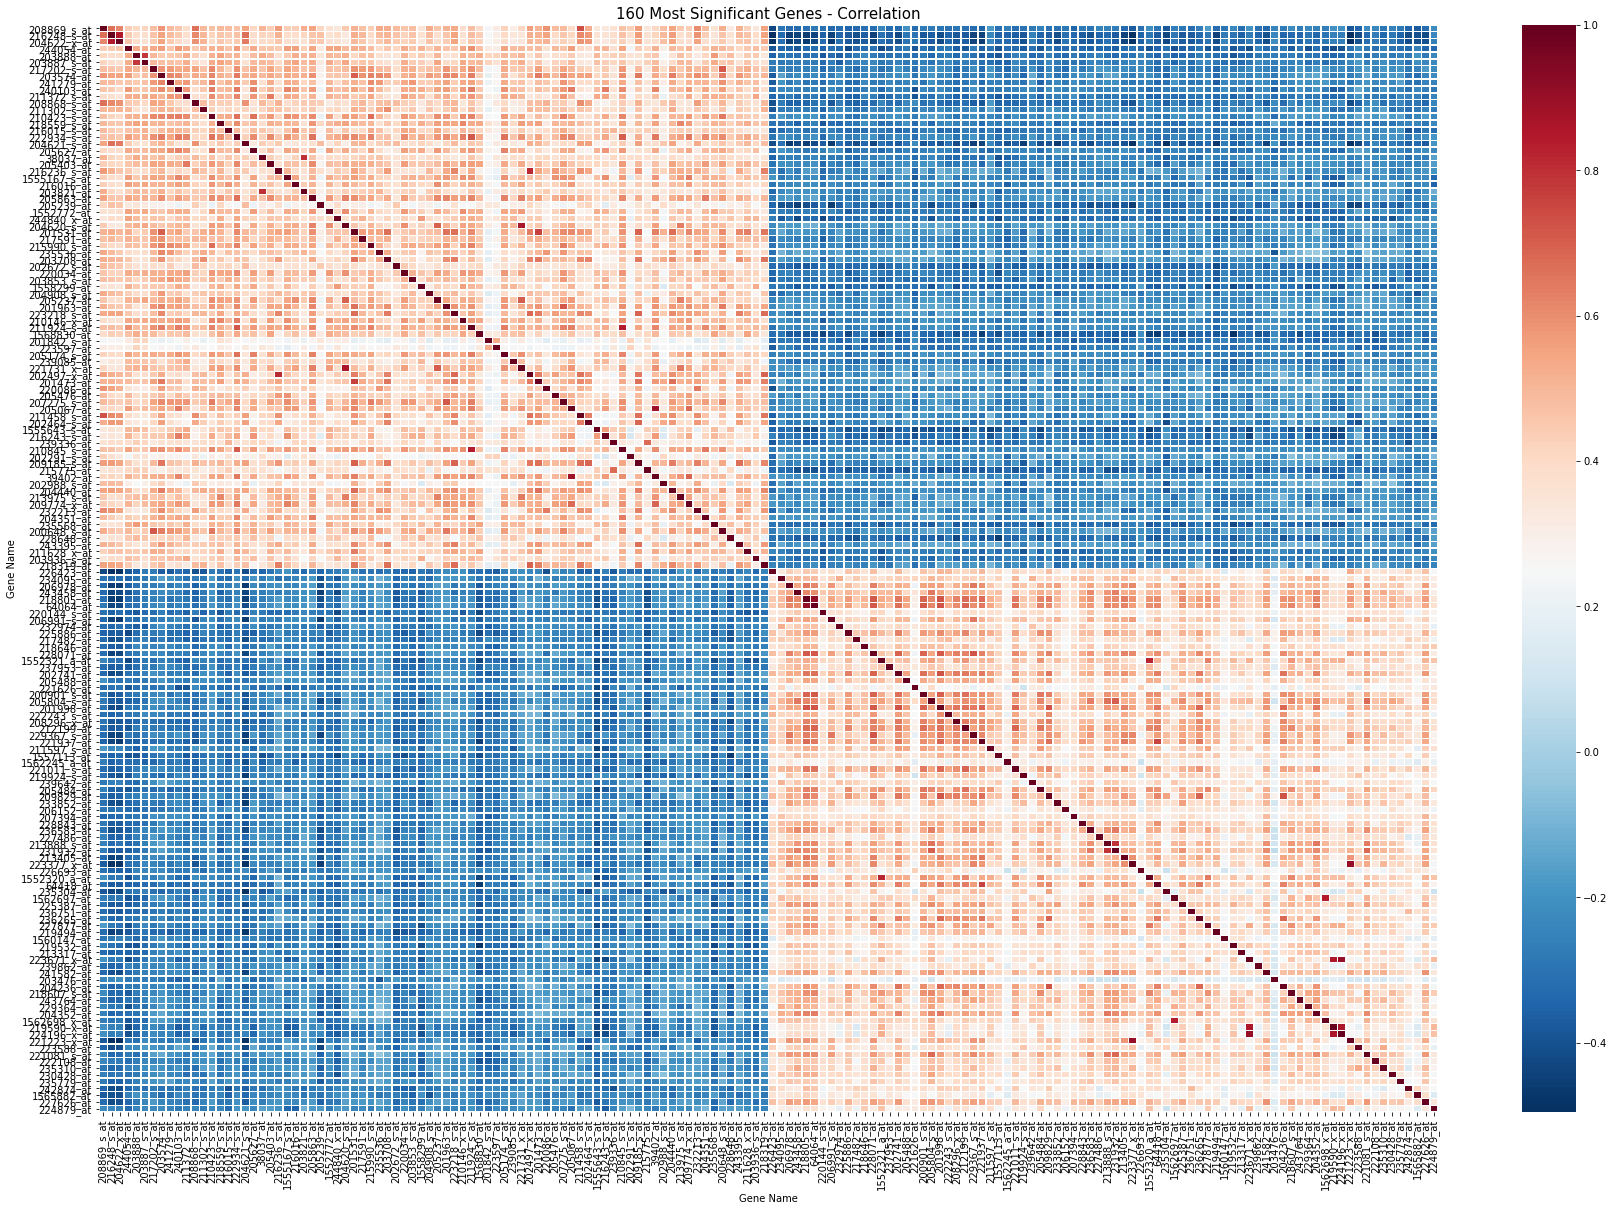

In [131]:
plt.figure(figsize = (30,20))
sns.heatmap(D_kendall_corr_df, 
            xticklabels=D_kendall_corr_df.columns,
            yticklabels=D_kendall_corr_df.columns,
            cmap='RdBu_r',
            linewidth=0.5)

plt.title(f'{n*2} Most Significant Genes - Correlation', fontsize=15)
plt.xlabel('Gene Name', fontsize=10)
plt.ylabel('Gene Name', fontsize=10)
plt.show()

#### 2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?

Index(['208869_s_at', '216248_s_at'], dtype='object')

#### 3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

In [145]:
significant_over_D_kendall_corr_df = D_kendall_corr_df[significant_overexpressed.index]

In [146]:
#significant_over_D_kendall_corr_df

,208869_s_at,216248_s_at,204622_x_at,244054_at,203888_at,203887_s_at,217202_s_at,203574_at,241279_at,240103_at,211372_s_at,208868_s_at,211302_s_at,210423_s_at,218559_s_at,216015_s_at,222934_s_at,204621_s_at,205627_at,38037_at,205403_at,216236_s_at,1555167_s_at,216016_at,203821_at,205863_at,205239_at,1552772_at,244840_x_at,204620_s_at,201531_at,217591_at,215990_s_at,235536_at,203708_at,202672_s_at,220034_at,203853_s_at,1558299_at,204908_s_at,205237_at,201963_at,223218_s_at,210146_x_at,211924_s_at,1568830_at,201842_s_at,223597_at,205174_s_at,239085_at,221731_x_at,202497_x_at,201473_at,220086_at,205476_at,207275_s_at,205067_at,211458_s_at,202464_s_at,1555643_s_at,216243_s_at,239336_at,210845_s_at,202291_s_at,209185_s_at,215775_at,39402_at,202988_s_at,204440_at,213975_s_at,209774_x_at,232213_at,204351_at,235568_at,200648_s_at,228648_at,243395_at,211628_x_at,203936_s_at,218319_at
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.408369,0.419913,0.475984,0.584003,0.489177,0.457019,0.383220,0.662750,0.494949,0.468818,0.493713,0.485879,0.462791,0.545511,0.408782,0.508967,0.437229,0.570398,0.435993,0.435580,0.522573,0.545248,0.414141,0.366972,0.336219,0.445887,0.511029,0.473098,0.434756,0.537827,0.525046,0.491651,0.460159,0.475984,0.349000,0.532055,0.460159,0.513915,0.538240,0.383632,0.478458,0.390641,0.237683,0.314607,0.423874,0.307772,0.410843,0.559678,0.505515,0.589775,0.491651,0.487941,0.394764,0.735312,0.522160,0.324330,0.331684,0.358071,0.471449,0.428984,0.565863,0.339930,0.408369,0.476397,0.544424,0.453309,0.435993,0.607091,0.486704,0.360544,0.525046,0.313544,0.513915,0.423624,0.337868,0.552257
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386931,0.386106,0.466089,0.555968,0.484230,0.450423,0.379097,0.614100,0.502371,0.416864,0.459905,0.440528,0.469388,0.665086,0.388992,0.420738,0.412492,0.515152,0.392290,0.389404,0.412080,0.457844,0.469388,0.362025,0.396413,0.333746,0.523397,0.492063,0.400948,0.490002,0.506081,0.464440,0.423874,0.464440,0.363843,0.486704,0.378518,0.461967,0.553082,0.363843,0.480932,0.433519,0.252525,0.305536,0.402433,0.345702,0.344877,0.525871,0.514586,0.553494,0.398475,0.452484,0.408782,0.613276,0.576582,0.355670,0.353948,0.387755,0.472274,0.378685,0.572459,0.364667,0.419913,0.487941,0.567512,0.370851,0.414554,0.587302,0.434756,0.348176,0.466502,0.360544,0.494949,0.463203,0.394764,0.553906
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.392290,0.373325,0.442589,0.554731,0.450010,0.400536,0.349825,0.590600,0.506081,0.398309,0.451247,0.426922,0.448361,0.639109,0.390229,0.398062,0.401361,0.457019,0.375387,0.367553,0.367141,0.456607,0.452484,0.378930,0.369615,0.325912,0.495774,0.454545,0.389817,0.449186,0.496599,0.445887,0.417277,0.449186,0.343640,0.473098,0.384703,0.443414,0.546073,0.365079,0.452484,0.426510,0.260359,0.308422,0.396248,0.318903,0.347763,0.502371,0.487785,0.514327,0.374150,0.428159,0.381159,0.585652,0.568749,0.337938,0.328798,0.384869,0.431457,0.332921,0.545661,0.351886,0.389817,0.475160,0.547310,0.382808,0.379509,0.550608,0.380746,0.371676,0.446300,0.355184,0.451659,0.465265,0.391053,0.534529
244054_at,0.433519,0.448361,0.457019,1.000000,0.531231,0.522160,0.534529,0.562564,0.460317,0.576582,0.529994,0.445887,0.490002,0.519534,0.515976,0.467739,0.566687,0.441192,0.534941,0.459493,0.458668,0.447537,0.567100,0.560091,0.431045,0.547722,0.322614,0.555407,0.554731,0.497011,0.525046,0.514327,0.484230,0.397650,0.452484,0.409194,0.531079,0.466914,0.511441,0.428984,0.505103,0.463616,0.455782,0.543599,0.591424,0.473923,0.320965,0.301412,0.554994,0.480932,0.492476,0.476397,0.491083,0.360544,0.497423,0.464853,0.563801,0.399711,0.364667,0.495464,0.508143,0.380334,0.547310,0.232736,0.444651,0.400948,0.517213,0.299938,0.494125,0.457431,0.506906,0.353948,0.447124,0.510616,0.496186,0.452896,0.401773,0.455782,0.476397,0.441765
203888_at,0.408369,0.386931,0.392290,0.531231,1.000000,0.783137,0.492888,0.447537,0.448361,0.460730,0.522160,0.433931,0.370851,0.511287,0.551845,0.491239,0.506081,0.374807,0.483405,0.531

In [147]:
triu_significant_over_D_kendall_corr_df = significant_over_D_kendall_corr_df.where(np.triu(np.ones(significant_over_D_kendall_corr_df.shape)).astype(np.bool))

triu_significant_over_D_kendall_corr_df = triu_significant_over_D_kendall_corr_df.stack().reset_index()
triu_significant_over_D_kendall_corr_df.columns = ['gene1','gene1','tau']
triu_significant_over_D_kendall_corr_df = triu_significant_over_D_kendall_corr_df[triu_significant_over_D_kendall_corr_df['tau'] !=1]

<AxesSubplot:>

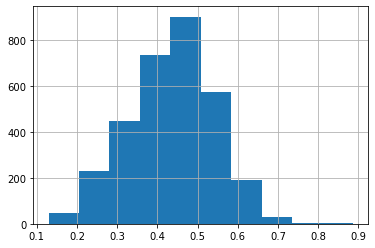

In [154]:
triu_significant_over_D_kendall_corr_df['tau'].hist()

In [156]:
print("the average of 80 choose 2 pairs from the overexpressed genes in D is {}".format(triu_significant_over_D_kendall_corr_df['tau'].mean()))

the average of 80 choose 2 pairs from the overexpressed genes in D is 0.43633375511449


In [ ]:
Compare it to the value in the above section. Explain.

#### 4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)?

#### 5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.

In [ ]:
#mne.stats.fdr_correction(pvals, alpha=0.05, method='indep')

#### 6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

### E. Plots and Conclusions of the DE and correlation analysis

#### 1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (high expression levels in M) using WRS and t-test using the results you had computed in Section 3c. State, for each comparison, the number of genes, k, at whichwe observe:
#### a) FDR = 0.05
#### b) FDR = 0.01
#### c) FDR = 0.005
#### If these events are not observed at any k>0, then make that statement.

#### 2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

#### 3) Heatmap ,Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.